# Econometria Aplicada

## Aula 3 - Modelos de probabilidade (Probit e Logit)



João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

## A regressão linear múltipla

**Motivação**: \\

 Jim O’Neill levanta uma hipótese no seu texto ["A Better Year for the Stock Market?"](https://github.com/costafilhojoao/Teaching/raw/main/Econometria%20Aplicada/Papers/A%20Better%20Year%20for%20Stock%20Markets_%20by%20Jim%20O'Neill%20-%20Project%20Syndicate.pdf): Se a bolsa dos EUA subir nos primeiros cinco pregões do ano, é provável que será um ano de alta. Será que isso é verdade? E será que vale para o Brasil? E para a Argentina?

### Pacotes

In [ ]:
install.packages("tidyquant") # pacote para obter os dados dos índices de ações

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyquant)

In [ ]:
install.packages("tidyverse") # para manipulação de dados

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


In [ ]:
library(tidyverse) 

### Dados

In [ ]:
indexes <- tibble(
  symbol = c(               # códigos dos índices
    "^BVSP",
    "^DJI", 
    "^MERV"
  ),
  exchange = c(             # nome dos índices
    "Ibovespa", 
    "Dow Jones", 
    "Merval"
)
)

In [ ]:
ind_quotes <- tq_get(
  indexes$symbol, get  = "stock.prices", 
  from = "1995-01-01", 
    to = "2022-02-01" )

In [ ]:
head( ind_quotes, 10 )

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
^BVSP,1995-01-02,4353.9,4397.6,4300.1,4301.0,0,4301.0
^BVSP,1995-01-03,4369.9,4385.9,4093.7,4098.0,0,4098.0
^BVSP,1995-01-04,4098.0,4098.0,3860.9,3967.9,0,3967.9
^BVSP,1995-01-05,3967.9,4040.3,3944.5,4036.7,0,4036.7
^BVSP,1995-01-06,4036.7,4105.7,3813.0,3827.4,0,3827.4
^BVSP,1995-01-09,3827.4,3835.7,3570.4,3627.8,0,3627.8
^BVSP,1995-01-10,3627.8,3691.9,3175.3,3270.0,0,3270.0
^BVSP,1995-01-11,3270.0,3504.7,3108.6,3499.1,0,3499.1
^BVSP,1995-01-12,3499.1,3840.7,3499.1,3840.6,0,3840.6


In [ ]:
tail( ind_quotes, 10 )

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
^MERV,2022-01-18,85038.8,85339.3,83249.2,83350.6,0,83350.6
^MERV,2022-01-19,83350.6,84040.9,83157.6,83528.2,0,83528.2
^MERV,2022-01-20,83528.2,85674.0,83528.2,85126.4,0,85126.4
^MERV,2022-01-21,85126.4,85172.9,83382.4,83622.5,0,83622.5
^MERV,2022-01-24,83622.5,83622.5,80403.4,81004.4,0,81004.4
^MERV,2022-01-25,81004.4,85320.7,80789.9,85180.4,0,85180.4
^MERV,2022-01-26,85180.4,86614.3,85180.4,85782.1,0,85782.1
^MERV,2022-01-27,85782.1,86586.0,85319.3,85968.8,0,85968.8
^MERV,2022-01-28,85968.8,90227.1,85968.8,88269.8,0,88269.8


In [ ]:
str( ind_quotes ) # estrutura dos dados

tibble [20,038 × 8] (S3: tbl_df/tbl/data.frame)
 $ symbol  : chr [1:20038] "^BVSP" "^BVSP" "^BVSP" "^BVSP" ...
 $ date    : Date[1:20038], format: "1995-01-02" "1995-01-03" ...
 $ open    : num [1:20038] 4354 4370 4098 3968 4037 ...
 $ high    : num [1:20038] 4398 4386 4098 4040 4106 ...
 $ low     : num [1:20038] 4300 4094 3861 3944 3813 ...
 $ close   : num [1:20038] 4301 4098 3968 4037 3827 ...
 $ volume  : num [1:20038] 0 0 0 0 0 0 0 0 0 0 ...
 $ adjusted: num [1:20038] 4301 4098 3968 4037 3827 ...


# Ibovespa

In [ ]:
ibov <- ind_quotes %>% filter(symbol == "^BVSP") %>%   
  filter( complete.cases( open ) )

In [ ]:
tail( ibov, 10 )

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
^BVSP,2022-01-18,106369,107013,105786,106522,11221900,106522
^BVSP,2022-01-19,106670,108602,106669,108013,12595600,108013
^BVSP,2022-01-20,108015,109873,108015,109102,13630500,109102
^BVSP,2022-01-21,109097,109786,108368,108942,13408400,108942
^BVSP,2022-01-24,108941,108948,106624,107752,12700800,107752
^BVSP,2022-01-25,107935,110115,107185,109845,13713900,109845
^BVSP,2022-01-26,110207,112695,110204,111573,15513800,111573
^BVSP,2022-01-27,111303,113057,111303,112315,14812000,112315
^BVSP,2022-01-28,112611,112969,111407,111478,13520100,111478


In [ ]:
base <- ibov %>% 
  mutate(ano = lubridate::year(date),    
         var_pos_5d = if_else( lag( close, 4 ) < close, 1, 0) ) %>%
  group_by(ano) %>%
  mutate( var_ano = if_else( ( last(close) - first(close) ) / first(close) * 100 > 0, 1, 0 ) ) %>% 
  group_by(ano) %>% 
    slice(5) %>% 
      select( ano, var_ano, var_pos_5d )

In [ ]:
head( base, 10 )

ano,var_ano,var_pos_5d
<dbl>,<dbl>,<dbl>
1995,0,0
1996,1,1
1997,1,1
1998,0,0
1999,1,0
2000,0,0
2001,0,1
2002,0,1
2003,1,1


### Visualização dos dados

Faz sentido fazer um gráfico de dispersão?

In [ ]:
library(ggplot2)

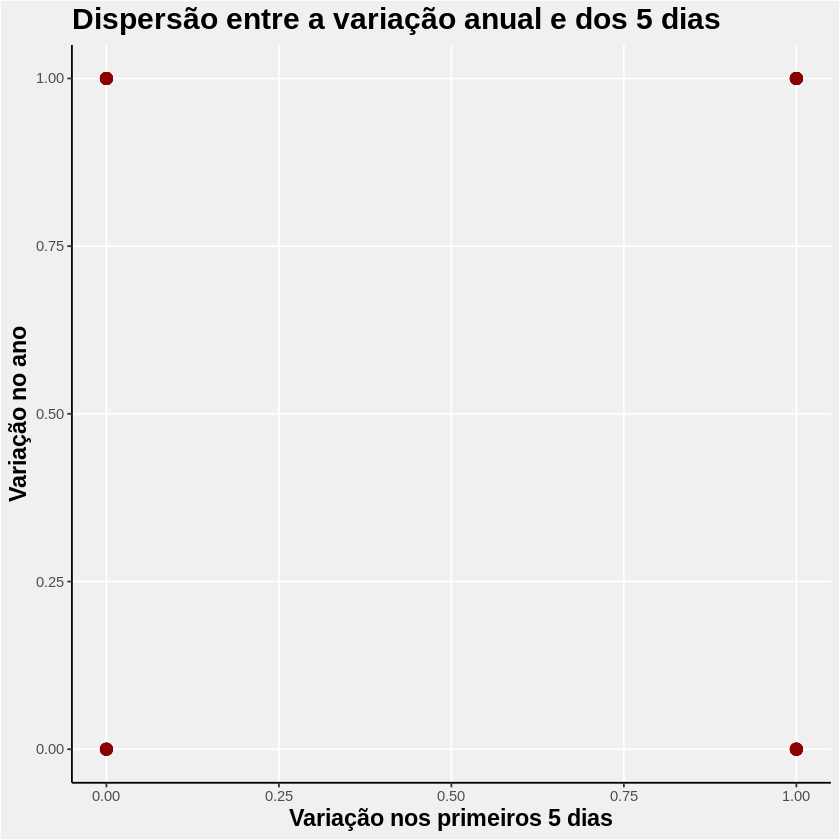

In [ ]:
ggplot( base, aes( x = var_pos_5d, y = var_ano ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre a variação anual e dos 5 dias",
       x = "Variação nos primeiros 5 dias",
       y = "Variação no ano") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

### Modelos

### [0] Modelo de probabilidade linear

In [ ]:
linear <- lm( var_ano ~ var_pos_5d, data = base )

In [ ]:
results <- tidy( linear )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   0.583      0.148     3.94  0.000553
2 var_pos_5d   -0.0208     0.196    -0.106 0.916   


In [ ]:
linear$coefficients[1] + linear$coefficients[2] * 1

(Intercept) 
     0.5625

### [1] Probit

In [ ]:
library(stats)
library(broom)

In [ ]:
probit <- glm( var_ano ~ var_pos_5d, data = base, family = binomial(link = "probit"))

In [ ]:
results <- tidy( probit )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)   0.210      0.365     0.577   0.564
2 var_pos_5d   -0.0531     0.482    -0.110   0.912


Qual é a probabilidade estimada quando há variação positiva nos primeiros 5 dias?

In [ ]:
prob <- predict( probit, newdata = data.frame(var_pos_5d = 1), type = "response")
round( prob, 4 )

1 
0.5625

### [2] Logit

In [ ]:
logit <- glm( var_ano ~ var_pos_5d, data = base, family = binomial(link = "logit"))

In [ ]:
results <- tidy( logit )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)   0.336      0.586     0.575   0.566
2 var_pos_5d   -0.0852     0.773    -0.110   0.912


Qual é a probabilidade estimada quando há variação positiva nos primeiros 5 dias?

In [ ]:
prob <- predict( logit, newdata = data.frame(var_pos_5d = 1), type = "response")
round( prob, 2 )

1 
0.56

### P-seudo R²

In [ ]:
install.packages("DescTools") # pacote para estatísticas descritivas, como o pseudo R²

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’




In [ ]:
library(DescTools)


Attaching package: ‘DescTools’


The following objects are masked from ‘package:tidyquant’:

    IRR, NPV, PMT




In [ ]:
round( PseudoR2( probit, which = "McKelveyZavoina" ) * 100, 2 )

McKelveyZavoina 
           0.07

In [ ]:
round( PseudoR2( logit, which = "McKelveyZavoina" ) * 100, 2 )

McKelveyZavoina 
           0.05

# Dow Jones

In [ ]:
dji <- ind_quotes %>% filter(symbol == "^DJI") %>%   
  filter( complete.cases( open ) )

In [ ]:
base <- dji %>% 
  mutate(ano = lubridate::year(date),    
         var_pos_5d = if_else( lag( close, 4 ) < close, 1, 0) ) %>%
  group_by(ano) %>%
  mutate( var_ano = if_else( ( last(close) - first(close) ) / first(close) * 100 > 0, 1, 0 ) ) %>% 
  group_by(ano) %>% 
    slice(5) %>% 
      select( ano, var_ano, var_pos_5d )

### Modelos

### [1] Probit

In [ ]:
probit <- glm( var_ano ~ var_pos_5d, data = base, family = binomial(link = "probit"))

In [ ]:
results <- tidy( probit )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)    0.431     0.374     1.15    0.250
2 var_pos_5d     0.244     0.506     0.482   0.630


Qual é a probabilidade estimada quando há variação positiva nos primeiros 5 dias?

In [ ]:
prob <- predict( probit, newdata = data.frame(var_pos_5d = 1), type = "response")
round( prob, 2 )

1 
0.75

### [2] Logit

In [ ]:
logit <- glm( var_ano ~ var_pos_5d, data = base, family = binomial(link = "logit"))

In [ ]:
results <- tidy( logit )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)    0.693     0.612     1.13    0.258
2 var_pos_5d     0.405     0.842     0.482   0.630


Qual é a probabilidade estimada quando há variação positiva nos primeiros 5 dias?

In [ ]:
prob <- predict( logit, newdata = data.frame(var_pos_5d = 1), type = "response")
round( prob, 2 )

1 
0.75

### P-seudo R²

In [ ]:
round( PseudoR2( probit, which = "McKelveyZavoina" ) * 100, 2 )

McKelveyZavoina 
           1.43

In [ ]:
round( PseudoR2( logit, which = "McKelveyZavoina" ) * 100, 2 )

McKelveyZavoina 
           1.21

# Merval

In [ ]:
merv <- ind_quotes %>% filter(symbol == "^MERV") %>%   
  filter( complete.cases( open ) )

In [ ]:
base <- merv %>% 
  mutate(ano = lubridate::year(date),    
         var_pos_5d = if_else( lag( close, 4 ) < close, 1, 0) ) %>%
  group_by(ano) %>%
  mutate( var_ano = if_else( ( last(close) - first(close) ) / first(close) * 100 > 0, 1, 0 ) ) %>% 
  group_by(ano) %>% 
    slice(5) %>% 
      select( ano, var_ano, var_pos_5d )

### Modelos

### [1] Probit

In [ ]:
probit <- glm( var_ano ~ var_pos_5d, data = base, family = binomial(link = "probit"))

In [ ]:
results <- tidy( probit )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)    0.502     0.364      1.38   0.168
2 var_pos_5d     0.565     0.552      1.02   0.306


Qual é a probabilidade estimada quando há variação positiva nos primeiros 5 dias?

In [ ]:
prob <- predict( probit, newdata = data.frame(var_pos_5d = 1), type = "response")
round( prob, 2 )

1 
0.86

### [2] Logit

In [ ]:
logit <- glm( var_ano ~ var_pos_5d, data = base, family = binomial(link = "logit"))

In [ ]:
results <- tidy( logit )

In [ ]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic p.value
  <chr>          <dbl>     <dbl>     <dbl>   <dbl>
1 (Intercept)    0.811     0.601      1.35   0.177
2 var_pos_5d     0.981     0.972      1.01   0.313


Qual é a probabilidade estimada quando há variação positiva nos primeiros 5 dias?

In [ ]:
prob <- predict( logit, newdata = data.frame(var_pos_5d = 1), type = "response")
round( prob, 2 )

1 
0.86

### P-seudo R²

In [ ]:
round( PseudoR2( probit, which = "McKelveyZavoina" ) * 100, 2 )

McKelveyZavoina 
           7.39

In [ ]:
round( PseudoR2( logit, which = "McKelveyZavoina" ) * 100, 2 )

McKelveyZavoina 
            6.8